# Introduction to the JupyterLab and Jupyter Notebooks

This is a short introduction to two of the flagship tools created by [the Jupyter Community](https://jupyter.org).

> **⚠️Experimental!⚠️**: This is an experimental interface provided by the [JupyterLite project](https://jupyterlite.readthedocs.io/en/latest/). It embeds an entire JupyterLab interface, with many popular packages for scientific computing, in your browser. There may be minor differences in behavior between JupyterLite and the JupyterLab you install locally. You may also encounter some bugs or unexpected behavior. To report any issues, or to get involved with the JupyterLite project, see [the JupyterLite repository](https://github.com/jupyterlite/jupyterlite/issues?q=is%3Aissue+is%3Aopen+sort%3Aupdated-desc).

## JupyterLab 🧪

**JupyterLab** is a next-generation web-based user interface for Project Jupyter. It enables you to work with documents and activities such as Jupyter notebooks, text editors, terminals, and custom components in a flexible, integrated, and extensible manner. It is the interface that you're looking at right now.

**For an overview of the JupyterLab interface**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Welcome Tour` and following the prompts.

> **See Also**: For a more in-depth tour of JupyterLab with a full environment that runs in the cloud, see [the JupyterLab introduction on Binder](https://mybinder.org/v2/gh/jupyterlab/jupyterlab-demo/HEAD?urlpath=lab/tree/demo).

## Jupyter Notebooks 📓

**Jupyter Notebooks** are a community standard for communicating and performing interactive computing. They are a document that blends computations, outputs, explanatory text, mathematics, images, and rich media representations of objects.

JupyterLab is one interface used to create and interact with Jupyter Notebooks.

**For an overview of Jupyter Notebooks**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Notebook Tour` and following the prompts.

> **See Also**: For a more in-depth tour of Jupyter Notebooks and the Classic Jupyter Notebook interface, see [the Jupyter Notebook IPython tutorial on Binder](https://mybinder.org/v2/gh/ipython/ipython-in-depth/HEAD?urlpath=tree/binder/Index.ipynb).

## An example: visualizing data in the notebook ✨

Below is an example of a code cell. We'll visualize some simple data using two popular packages in Python. We'll use [NumPy](https://numpy.org/) to create some random data, and [Matplotlib](https://matplotlib.org) to visualize it.

Note how the code and the results of running the code are bundled together.

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
from PIL import Image, ImageDraw
import numpy as np

sns.set_theme(style="whitegrid")

In [62]:
pd.set_option('display.max_columns', None)

df = pd.read_csv("dados.csv")
#df.head()

In [63]:
def clean(ms):
    return ms.split("=")[1]

df = df.apply(lambda s: s.apply(clean))
    
#df.head()

In [64]:
df.scouter = df.scouter.astype("string")
df.event = df.event.astype("string")
df.level = df.level.astype("string")
df.match = df.match.astype("string")
df.driveteam_pos = df.driveteam_pos.astype("string")
df.team = pd.to_numeric(df.team, downcast='integer')
df.starting_pos = pd.to_numeric(df.starting_pos, downcast='integer')
df.taxied = df.taxied.map({"Y":True, "N":False})
df.auto_upper_cargo = pd.to_numeric(df.auto_upper_cargo, downcast='integer')
df.auto_lower_cargo = pd.to_numeric(df.auto_lower_cargo, downcast='integer')
df.auto_collect_cargo = df.auto_collect_cargo.map({"Y":True, "N":False})
df.teleop_upper_cargo = pd.to_numeric(df.teleop_upper_cargo, downcast='integer')
df.teleop_lower_cargo = pd.to_numeric(df.teleop_lower_cargo, downcast='integer')
df.defense = df.defense.map({"Y":True, "N":False})
df.wallbot = df.wallbot.map({"Y":True, "N":False})
df.cargo_from = df.cargo_from.astype("string")
df.cargo_shots = df.cargo_shots.astype("string")
df.climb = df.climb.astype("string")
df.climb_early = df.climb_early.map({"Y":True, "N":False})
df.total_alliance_climbed = pd.to_numeric(df.total_alliance_climbed, downcast='integer')
df.pilot = df.pilot.astype("string")
df.defense_rating = df.defense_rating.astype("string")
df.enemy_cargo = df.enemy_cargo.map({"Y":True, "N":False})
df.swerve = df.swerve.map({"Y":True, "N":False})
df.speed = pd.to_numeric(df.speed, downcast='integer')
df.died_tiped = df.died_tiped.map({"Y":True, "N":False})
df.good_partners = df.good_partners.map({"Y":True, "N":False})
df.comments = df.comments.astype("string")
df.confidence = df.confidence.astype("string")

#df.dtypes

<AxesSubplot:xlabel='activity', ylabel='score'>

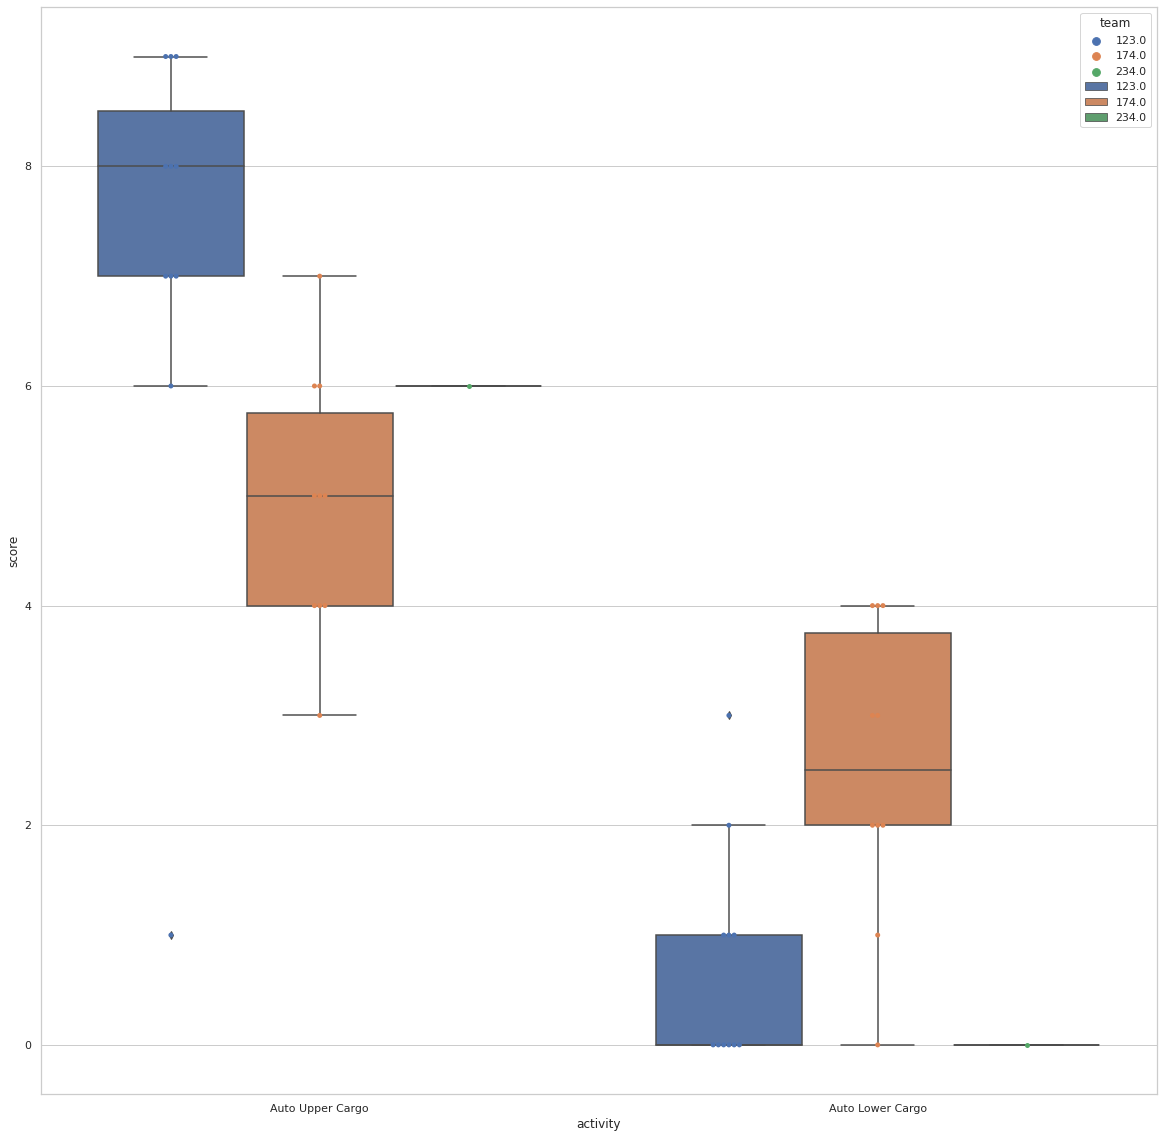

In [65]:
teamA = 174
teamB = 394

da = pd.DataFrame()


for ix, row in df.iterrows():
    da.at[ix*2, 'team']  = df.at[ix, 'team']
    da.at[ix*2, 'activity']  = "Auto Upper Cargo"
    da.at[ix*2, 'score']  = df.at[ix, 'auto_upper_cargo']
    
    da.at[ix*2+1, 'team']  = df.at[ix, 'team']
    da.at[ix*2+1, 'activity']  = "Auto Lower Cargo"
    da.at[ix*2+1, 'score']  = df.at[ix, 'auto_lower_cargo']


da.head()

sns.swarmplot(x="activity", y="score", hue="team", dodge=True, data=da)
sns.boxplot(x="activity", y="score", hue="team", data=da)

<AxesSubplot:xlabel='team', ylabel='teleop_lower_cargo'>

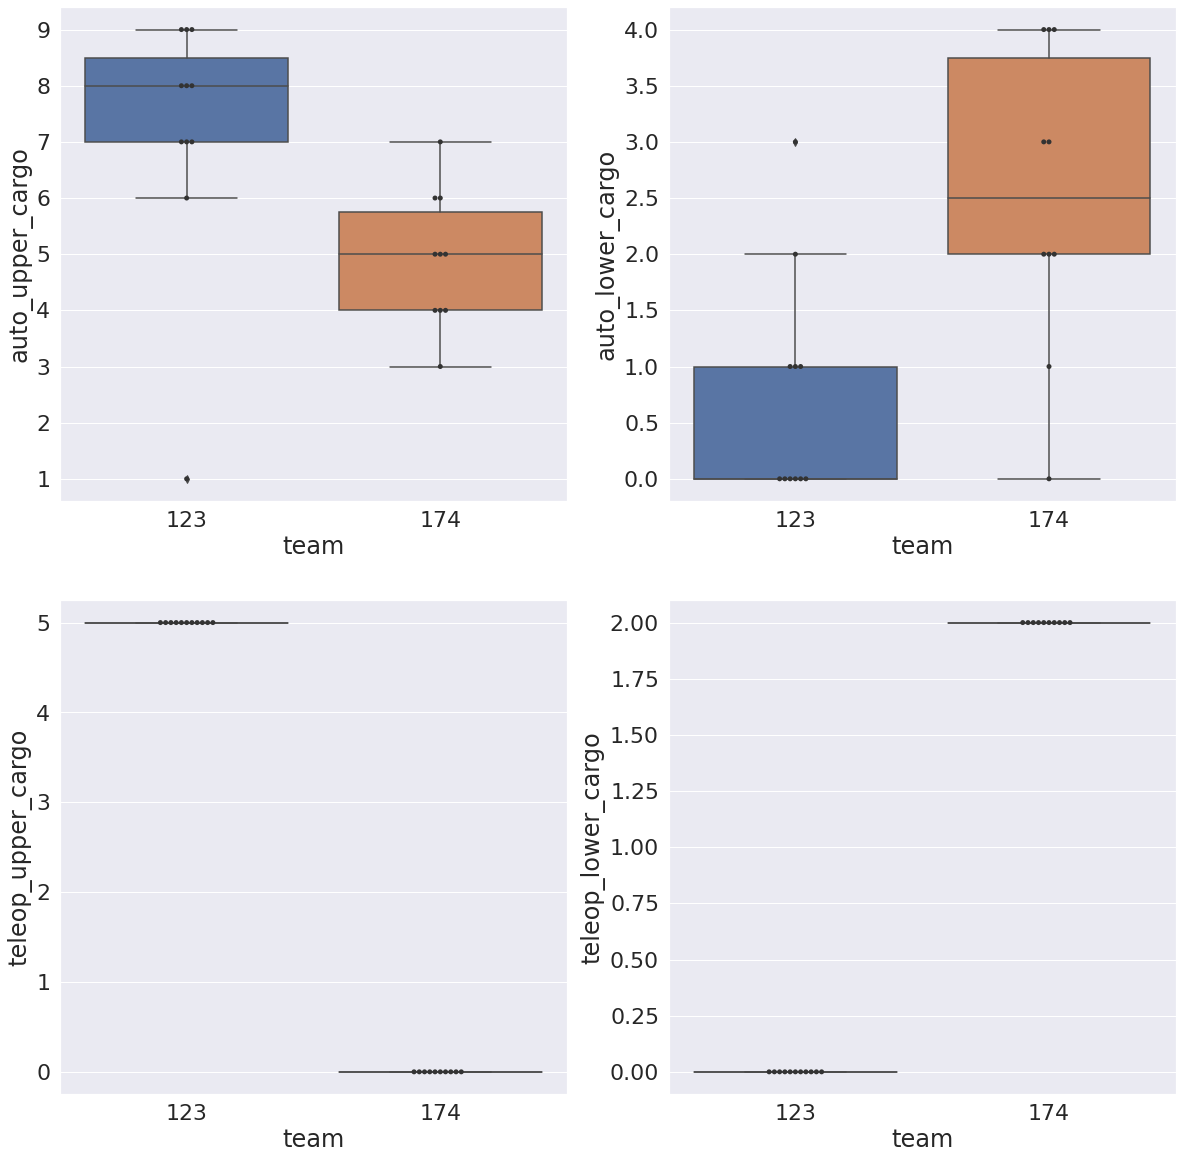

In [66]:
teams = [174, 123]
da = df[df["team"].isin(teams)]


sns.set(font_scale=2)
plt.rcParams["figure.figsize"]=20,20
fig, axes = plt.subplots(2, 2)

sns.swarmplot(x="team", y="auto_upper_cargo", dodge=True, data=da, color=".2", ax=axes[0,0])
sns.boxplot(x="team", y="auto_upper_cargo", data=da, ax=axes[0,0])

sns.swarmplot(x="team", y="auto_lower_cargo", dodge=True, data=da, color=".2", ax=axes[0,1])
sns.boxplot(x="team", y="auto_lower_cargo", data=da,  ax=axes[0,1])

sns.swarmplot(x="team", y="teleop_upper_cargo", dodge=True, data=da, color=".2", ax=axes[1,0])
sns.boxplot(x="team", y="teleop_upper_cargo", data=da,  ax=axes[1,0])

sns.swarmplot(x="team", y="teleop_lower_cargo", dodge=True, data=da, color=".2", ax=axes[1,1])
sns.boxplot(x="team", y="teleop_lower_cargo", data=da, ax=axes[1,1])

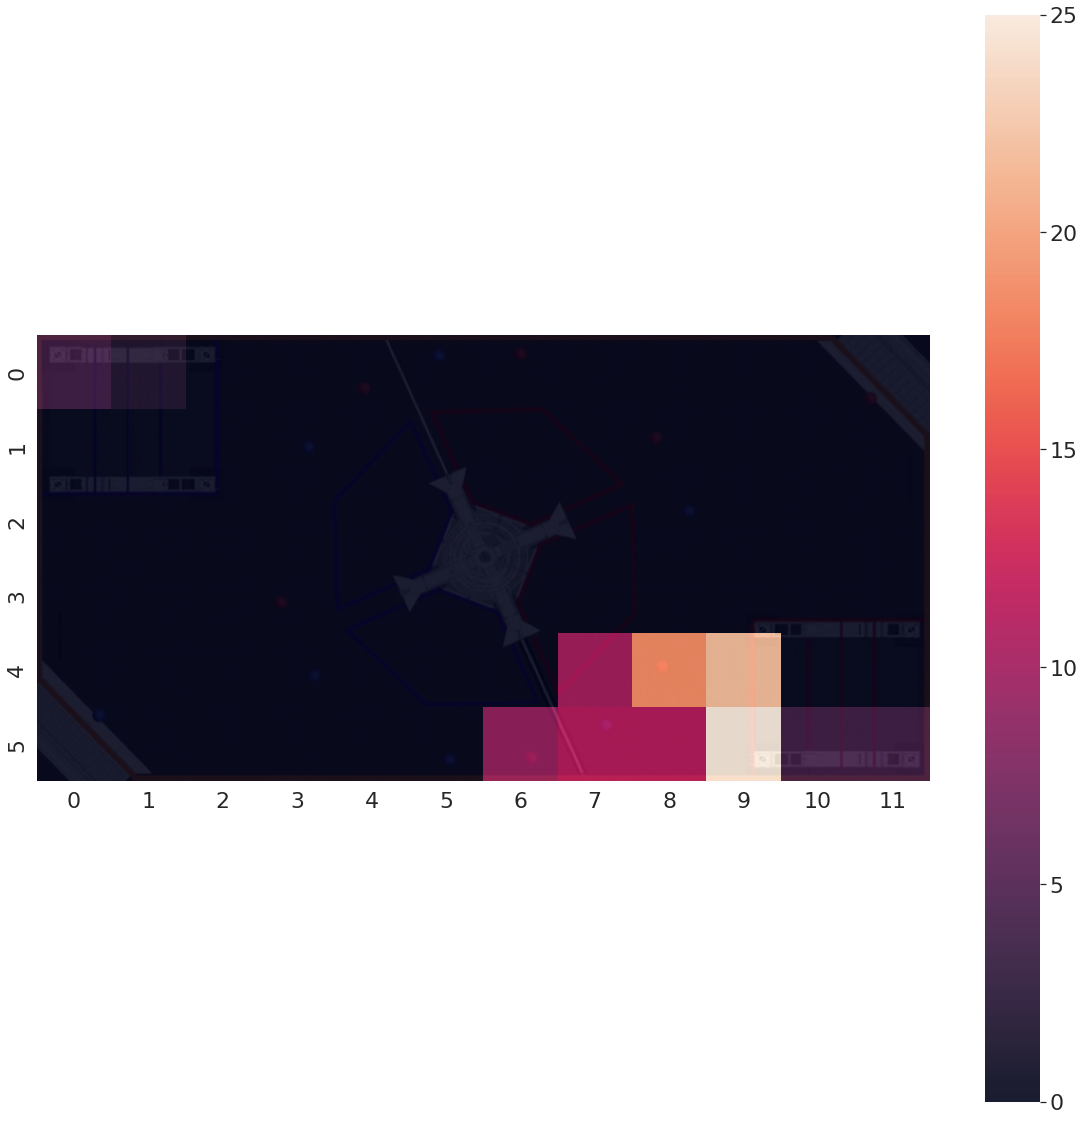

In [76]:
team = 123
da = df[df["team"] == team].cargo_shots

shots = np.zeros((6,12))

for _,val in da.iteritems():
    locs = list(map(int, val.split('@')))
    
    for loc in locs:
        loc -= 1
        r = loc % 12
        c = loc //12
        if loc in shots:
            shots[c][r] += 1
        else:
            shots[c][r] += 1
            

da = pd.DataFrame(shots)            
plt.imshow(im, zorder=0)
h = sns.heatmap(da, alpha=0.9, zorder=2)
im = mpimg.imread("./2022/field_image.png")

h.imshow(im,
         aspect=h.get_aspect(),
         extent= h.get_xlim() + h.get_ylim(),
         zorder=1)

plt.show()

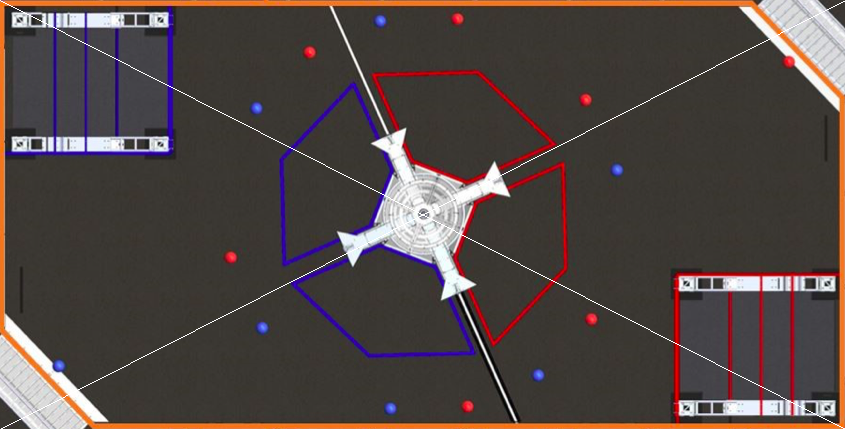

In [68]:
#Create Image object
im = Image.open("2022/field_image.png")

#Draw line
draw = ImageDraw.Draw(im)
draw.line((0, 0) + im.size, fill=128)
draw.line((0, im.size[1], im.size[0], 0), fill=128)

#Show image
display(im)